In [ ]:
import pandas as pd
import numpy as np


In [ ]:
tweets=pd.read_csv("/content/Elon_musk.csv", sep=";", encoding='cp1252',error_bad_lines=False)

<ipython-input-2-0d508521c58f>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tweets=pd.read_csv("/content/Elon_musk.csv", sep=";", encoding='cp1252',error_bad_lines=False)
Skipping line 29: expected 1 fields, saw 2
Skipping line 34: expected 1 fields, saw 2
Skipping line 49: expected 1 fields, saw 2
Skipping line 55: expected 1 fields, saw 2
Skipping line 69: expected 1 fields, saw 2
Skipping line 98: expected 1 fields, saw 2
Skipping line 113: expected 1 fields, saw 2
Skipping line 120: expected 1 fields, saw 2
Skipping line 137: expected 1 fields, saw 2
Skipping line 141: expected 1 fields, saw 2
Skipping line 149: expected 1 fields, saw 2
Skipping line 154: expected 1 fields, saw 3
Skipping line 155: expected 1 fields, saw 2
Skipping line 163: expected 1 fields, saw 2
Skipping line 184: expected 1 fields, saw 2
Skipping line 188: expected 1 fields, saw 2
Skipping line 189: expected 1 fi

In [ ]:
tweets

,",Text"
0,"1,@kunalb11 I’m an alien"
1,"2,@ID_AA_Carmack Ray tracing on Cyberpunk with..."
2,"3,@joerogan @Spotify Great interview!"
3,"4,@gtera27 Doge is underestimated"
4,"5,@teslacn Congratulations Tesla China for ama..."
...,...
1864,"1993,AI symbiosis while u wait"
1865,"1994,@vistacruiser7 @flcnhvy There’s some of t..."
1866,"1997,@TeslaGong @PPathole Samwise Gamgee"
1867,"1998,@PPathole Altho Dumb and Dumber is <U+000..."


In [ ]:
tweets=tweets.rename(columns = {',Text':'Text'})

In [ ]:
tweets

,Text
0,"1,@kunalb11 I’m an alien"
1,"2,@ID_AA_Carmack Ray tracing on Cyberpunk with..."
2,"3,@joerogan @Spotify Great interview!"
3,"4,@gtera27 Doge is underestimated"
4,"5,@teslacn Congratulations Tesla China for ama..."
...,...
1864,"1993,AI symbiosis while u wait"
1865,"1994,@vistacruiser7 @flcnhvy There’s some of t..."
1866,"1997,@TeslaGong @PPathole Samwise Gamgee"
1867,"1998,@PPathole Altho Dumb and Dumber is <U+000..."


In [ ]:
f = "     tgfd      "
f = f.strip()
f

'tgfd'

In [ ]:
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [ ]:
tweets=[Text.strip() for Text in tweets.Text] # remove both the leading and the trailing characters
tweets=[Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['1,@kunalb11 I’m an alien',
 '2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '3,@joerogan @Spotify Great interview!',
 '4,@gtera27 Doge is underestimated',
 '5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 '6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 '7,"Frodo was the underdoge,',
 'All thought he would fail,',
 'Himself most of all. https://t.co/zGxJFDzzrM"',
 '8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)']

In [ ]:
tweets_text=' '.join(tweets)
tweets_text

'1,@kunalb11 I’m an alien 2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? 3,@joerogan @Spotify Great interview! 4,@gtera27 Doge is underestimated 5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! 6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj 7,"Frodo was the underdoge, All thought he would fail, Himself most of all. https://t.co/zGxJFDzzrM" 8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) 9,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. 10,The most entertaining outcome is the most likely 11,@GiveDirectly Just sent some 12,Just agree to do Clubhouse with @kanyewest 13,https://t.co/3rWE9uHSTS 14,@geoffkeighley @UnrealEngine It’s getting real 15,"Bought some Dogecoin for lil X, so he can be a toddler hodler" 16,"@JoshManMode He definitely has issues, but the sentencing seems a bit high" 17,@freewalletorg Thanks for fixing 18,@freewalletorg Please u

In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens)

['1', ',', 'I', '’', 'm', 'an', 'alien', '2', ',', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', '3', ',', 'Great', 'interview', '!', '4', ',', 'Doge', 'is', 'underestimated', '5', ',', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', '6', ',', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', '7', ',', '"', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', '"', '8', ',', 'Haha', 'thanks', ':)', '9', ',', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', '10', ',', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '11', ',', 'Just', 'sent', 'some', '12', ',', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', '13', 

In [ ]:
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text

'1 , I ’ m an alien 2 , Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? 3 , Great interview ! 4 , Doge is underestimated 5 , Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! 6 , Happy New Year of the Ox ! https://t.co/9WFKMYu2oj 7 , " Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM " 8 , Haha thanks :) 9 , Indeed ! Tweets definitely do not represent real-world time allocation . 10 , The most entertaining outcome is the most likely 11 , Just sent some 12 , Just agree to do Clubhouse with 13 , https://t.co/3rWE9uHSTS 14 , It ’ s getting real 15 , " Bought some Dogecoin for lil X , so he can be a toddler hodler " 16 , " He definitely has issues , but the sentencing seems a bit high " 17 , Thanks for fixing 18 , Please unlock my account 19 , <U+0001F923> <U+0001F923> 20 , This is true power haha https://t.co/Fc9uhQSd7O 21 , Any crypto wallet that won ’ t give you your

In [ ]:
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'1  I ’ m an alien 2  Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  3  Great interview  4  Doge is underestimated 5  Congratulations Tesla China for amazing execution last year  Now on to the next for even more   6  Happy New Year of the Ox  httpstco9WFKMYu2oj 7   Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM  8  Haha thanks  9  Indeed  Tweets definitely do not represent realworld time allocation  10  The most entertaining outcome is the most likely 11  Just sent some 12  Just agree to do Clubhouse with 13  httpstco3rWE9uHSTS 14  It ’ s getting real 15   Bought some Dogecoin for lil X  so he can be a toddler hodler  16   He definitely has issues  but the sentencing seems a bit high  17  Thanks for fixing 18  Please unlock my account 19  U0001F923 U0001F923 20  This is true power haha httpstcoFc9uhQSd7O 21  Any crypto wallet that won ’ t give you your private keys should be avoided at all costs 22  Your app sucks 23  RT 

In [ ]:
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'1  I ’ m an alien 2  Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  3  Great interview  4  Doge is underestimated 5  Congratulations Tesla China for amazing execution last year  Now on to the next for even more   6  Happy New Year of the Ox   7   Frodo was the underdoge  All thought he would fail  Himself most of all    8  Haha thanks  9  Indeed  Tweets definitely do not represent realworld time allocation  10  The most entertaining outcome is the most likely 11  Just sent some 12  Just agree to do Clubhouse with 13   14  It ’ s getting real 15   Bought some Dogecoin for lil X  so he can be a toddler hodler  16   He definitely has issues  but the sentencing seems a bit high  17  Thanks for fixing 18  Please unlock my account 19  U0001F923 U0001F923 20  This is true power haha  21  Any crypto wallet that won ’ t give you your private keys should be avoided at all costs 22  Your app sucks 23  RT  NASA has selected Falcon Heavy to launch the first two elements of the 

In [ ]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['1', 'I', '’', 'm', 'an', 'alien', '2', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', '3', 'Great', 'interview', '4', 'Doge', 'is', 'underestimated', '5', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '6', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '7', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', '8', 'Haha', 'thanks', '9', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', '10', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '11', 'Just', 'sent', 'some', '12', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', '13', '14', 'It', '’', 's', 'getting', 'real', '15', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', '16', 'He', 'definitely', 'has', 'issues', 'b

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
len(text_tokens)

17063

In [ ]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['1', '’', 'alien', '2', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', '3', 'Great', 'interview', '4', 'Doge', 'underestimated', '5', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', '6', 'Happy', 'New', 'Year', 'Ox', '7', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', '8', 'Haha', 'thanks', '9', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', '10', 'The', 'entertaining', 'outcome', 'likely', '11', 'Just', 'sent', '12', 'Just', 'agree', 'Clubhouse', '13', '14', 'It', '’', 'getting', 'real', '15', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', '16', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', '17', 'Thanks', 'fixing', '18', 'Please', 'unlock', 'account', '19', '20', 'This', 'true', 'power', '21', 'Any', 'crypto', 'wallet', '’', 'give', 'private', 'keys', 'avoided', 'costs', '22', 'Your', 'app', 'sucks', '23', 'RT', 'NASA', 'selec

In [ ]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['wallet', '’', 'give', 'private', 'keys', 'avoided', 'costs', '22', 'your', 'app', 'sucks', '23', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', '24', '25', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', '27', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', '…', '28', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', '…', '30', 'this', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', '31', '32', 'xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', '33', 'everyone', 'tesla', 'receives', 'stock', 'my', 'comp', 'stock', 'options', 'take', 'table', 'that', '’', '’', 'missing', '34', 'back', 'work', 'go', '…']


In [ ]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

1 ’ alien 2 ray tracing cyberpunk hdr nextlevel have tried 3 great interview 4 doge underestimated 5 congratulations tesla china amazing execution last year now next even 6 happy new year ox 7 frodo underdoge all thought would fail himself 8 haha thanks 9 indeed tweets definitely represent realworld time allocation 10 the entertaining outcome likely 11 just sent 12 just agree clubhouse 13 14 it ’ getting real 15 bought dogecoin lil x toddler hodler 16 he definitely issues sentencing seems bit high 17 thanks fixing 18 please unlock account 19 20 this true power 21 any crypto wallet ’ give private keys avoided costs 22 your app sucks 23 rt nasa selected falcon heavy launch first two elements lunar gateway together one mission 24 25 once predict cash flow reasonably well starlink ipo 27 spacex needs pass deep chasm negative cash flow next year … 28 lowest cost per ton carbon sequestered net value product made must scalable g … 30 this intended earth may ideas apply mars 31 32 xprize team 

In [ ]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['1', "'", 'alien', '2', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', '3', 'great', 'interview', '4', 'doge', 'underestimate', '5', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', '6', 'happy', 'new', 'year', 'ox', '7', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', '8', 'haha', 'thank', '9', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', '10', 'the', 'entertaining', 'outcome', 'likely', '11', 'just', 'send', '12', 'just', 'agree', 'clubhouse', '13', '14', 'it', "'", 'get', 'real', '15', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', '16', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', '17', 'thank', 'fix', '18', 'please', 'unlock', 'account', '19', '20', 'this', 'true', 'power', '21', 'any', 'crypto', 'wallet', "'", 'give', 'private', 'key', 'avoid', 'cost', '22', 'your', 'app', 'suck', '23', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'la

In [ ]:
clean_tweets=' '.join(lemmas)
clean_tweets

'1 \' alien 2 ray trace cyberpunk hdr nextlevel have try 3 great interview 4 doge underestimate 5 congratulation tesla china amazing execution last year now next even 6 happy new year ox 7 frodo underdoge all thought would fail himself 8 haha thank 9 indeed tweet definitely represent realworld time allocation 10 the entertaining outcome likely 11 just send 12 just agree clubhouse 13 14 it \' get real 15 buy dogecoin lil x toddler hodler 16 he definitely issue sentencing seem bit high 17 thank fix 18 please unlock account 19 20 this true power 21 any crypto wallet \' give private key avoid cost 22 your app suck 23 rt nasa select falcon heavy launch first two element lunar gateway together one mission 24 25 once predict cash flow reasonably well starlink ipo 27 spacex need pass deep chasm negative cash flow next year … 28 low cost per ton carbon sequester net value product make must scalable g … 30 this intend earth may idea apply mar 31 32 xprize team manage 100 m carbon capture prize 3

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [ ]:
cv.vocabulary_

{'alien': 1899,
 'ray': 3794,
 'trace': 4382,
 'cyberpunk': 2403,
 'hdr': 2933,
 'nextlevel': 3462,
 'have': 2928,
 'try': 4410,
 'great': 2883,
 'interview': 3109,
 'doge': 2515,
 'underestimate': 4534,
 'congratulation': 2327,
 'tesla': 4293,
 'china': 2247,
 'amazing': 1918,
 'execution': 2663,
 'last': 3185,
 'year': 4731,
 'now': 3487,
 'next': 3461,
 'even': 2638,
 'happy': 2916,
 'new': 3459,
 'ox': 3579,
 'frodo': 2798,
 'underdoge': 4533,
 'all': 1901,
 'thought': 4328,
 'would': 4718,
 'fail': 2694,
 'himself': 2974,
 'haha': 2905,
 'thank': 4304,
 'indeed': 3057,
 'tweet': 4424,
 'definitely': 2439,
 'represent': 3847,
 'realworld': 3808,
 'time': 4344,
 'allocation': 1902,
 '10': 1,
 'the': 4308,
 'entertaining': 2611,
 'outcome': 3559,
 'likely': 3232,
 '11': 100,
 'just': 3144,
 'send': 3975,
 '12': 202,
 'agree': 1884,
 'clubhouse': 2271,
 '13': 294,
 '14': 388,
 'it': 3126,
 'get': 2849,
 'real': 3803,
 '15': 485,
 'buy': 2176,
 'dogecoin': 2517,
 'lil': 3233,
 'toddler

In [ ]:
cv.get_feature_names_out()[100:200]

array(['11', '110', '1100', '1101', '1102', '1105', '1106', '1107',
       '1108', '1109', '111', '1110', '1111', '1112', '1113', '1114',
       '1115', '1116', '1117', '1118', '1119', '112', '1120', '1121',
       '1122', '1123', '1124', '1125', '1126', '1127', '1128', '1129',
       '113', '1130', '1131', '1132', '1133', '1134', '1135', '1136',
       '1137', '1138', '1139', '114', '1140', '1141', '1143', '1144',
       '1145', '1146', '1147', '1148', '1149', '115', '1150', '1151',
       '1152', '1153', '1154', '1155', '1157', '1158', '1159', '116',
       '1160', '1161', '1162', '1163', '1164', '1165', '1166', '1167',
       '1168', '1169', '1171', '1172', '1173', '1174', '1175', '1176',
       '1177', '1179', '118', '1181', '1182', '1183', '1184', '1185',
       '1186', '1187', '1188', '119', '1190', '1191', '1192', '1193',
       '1194', '1195', '1196', '1197'], dtype=object)

In [ ]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(tweetscv.toarray().shape)

(11944, 4750)


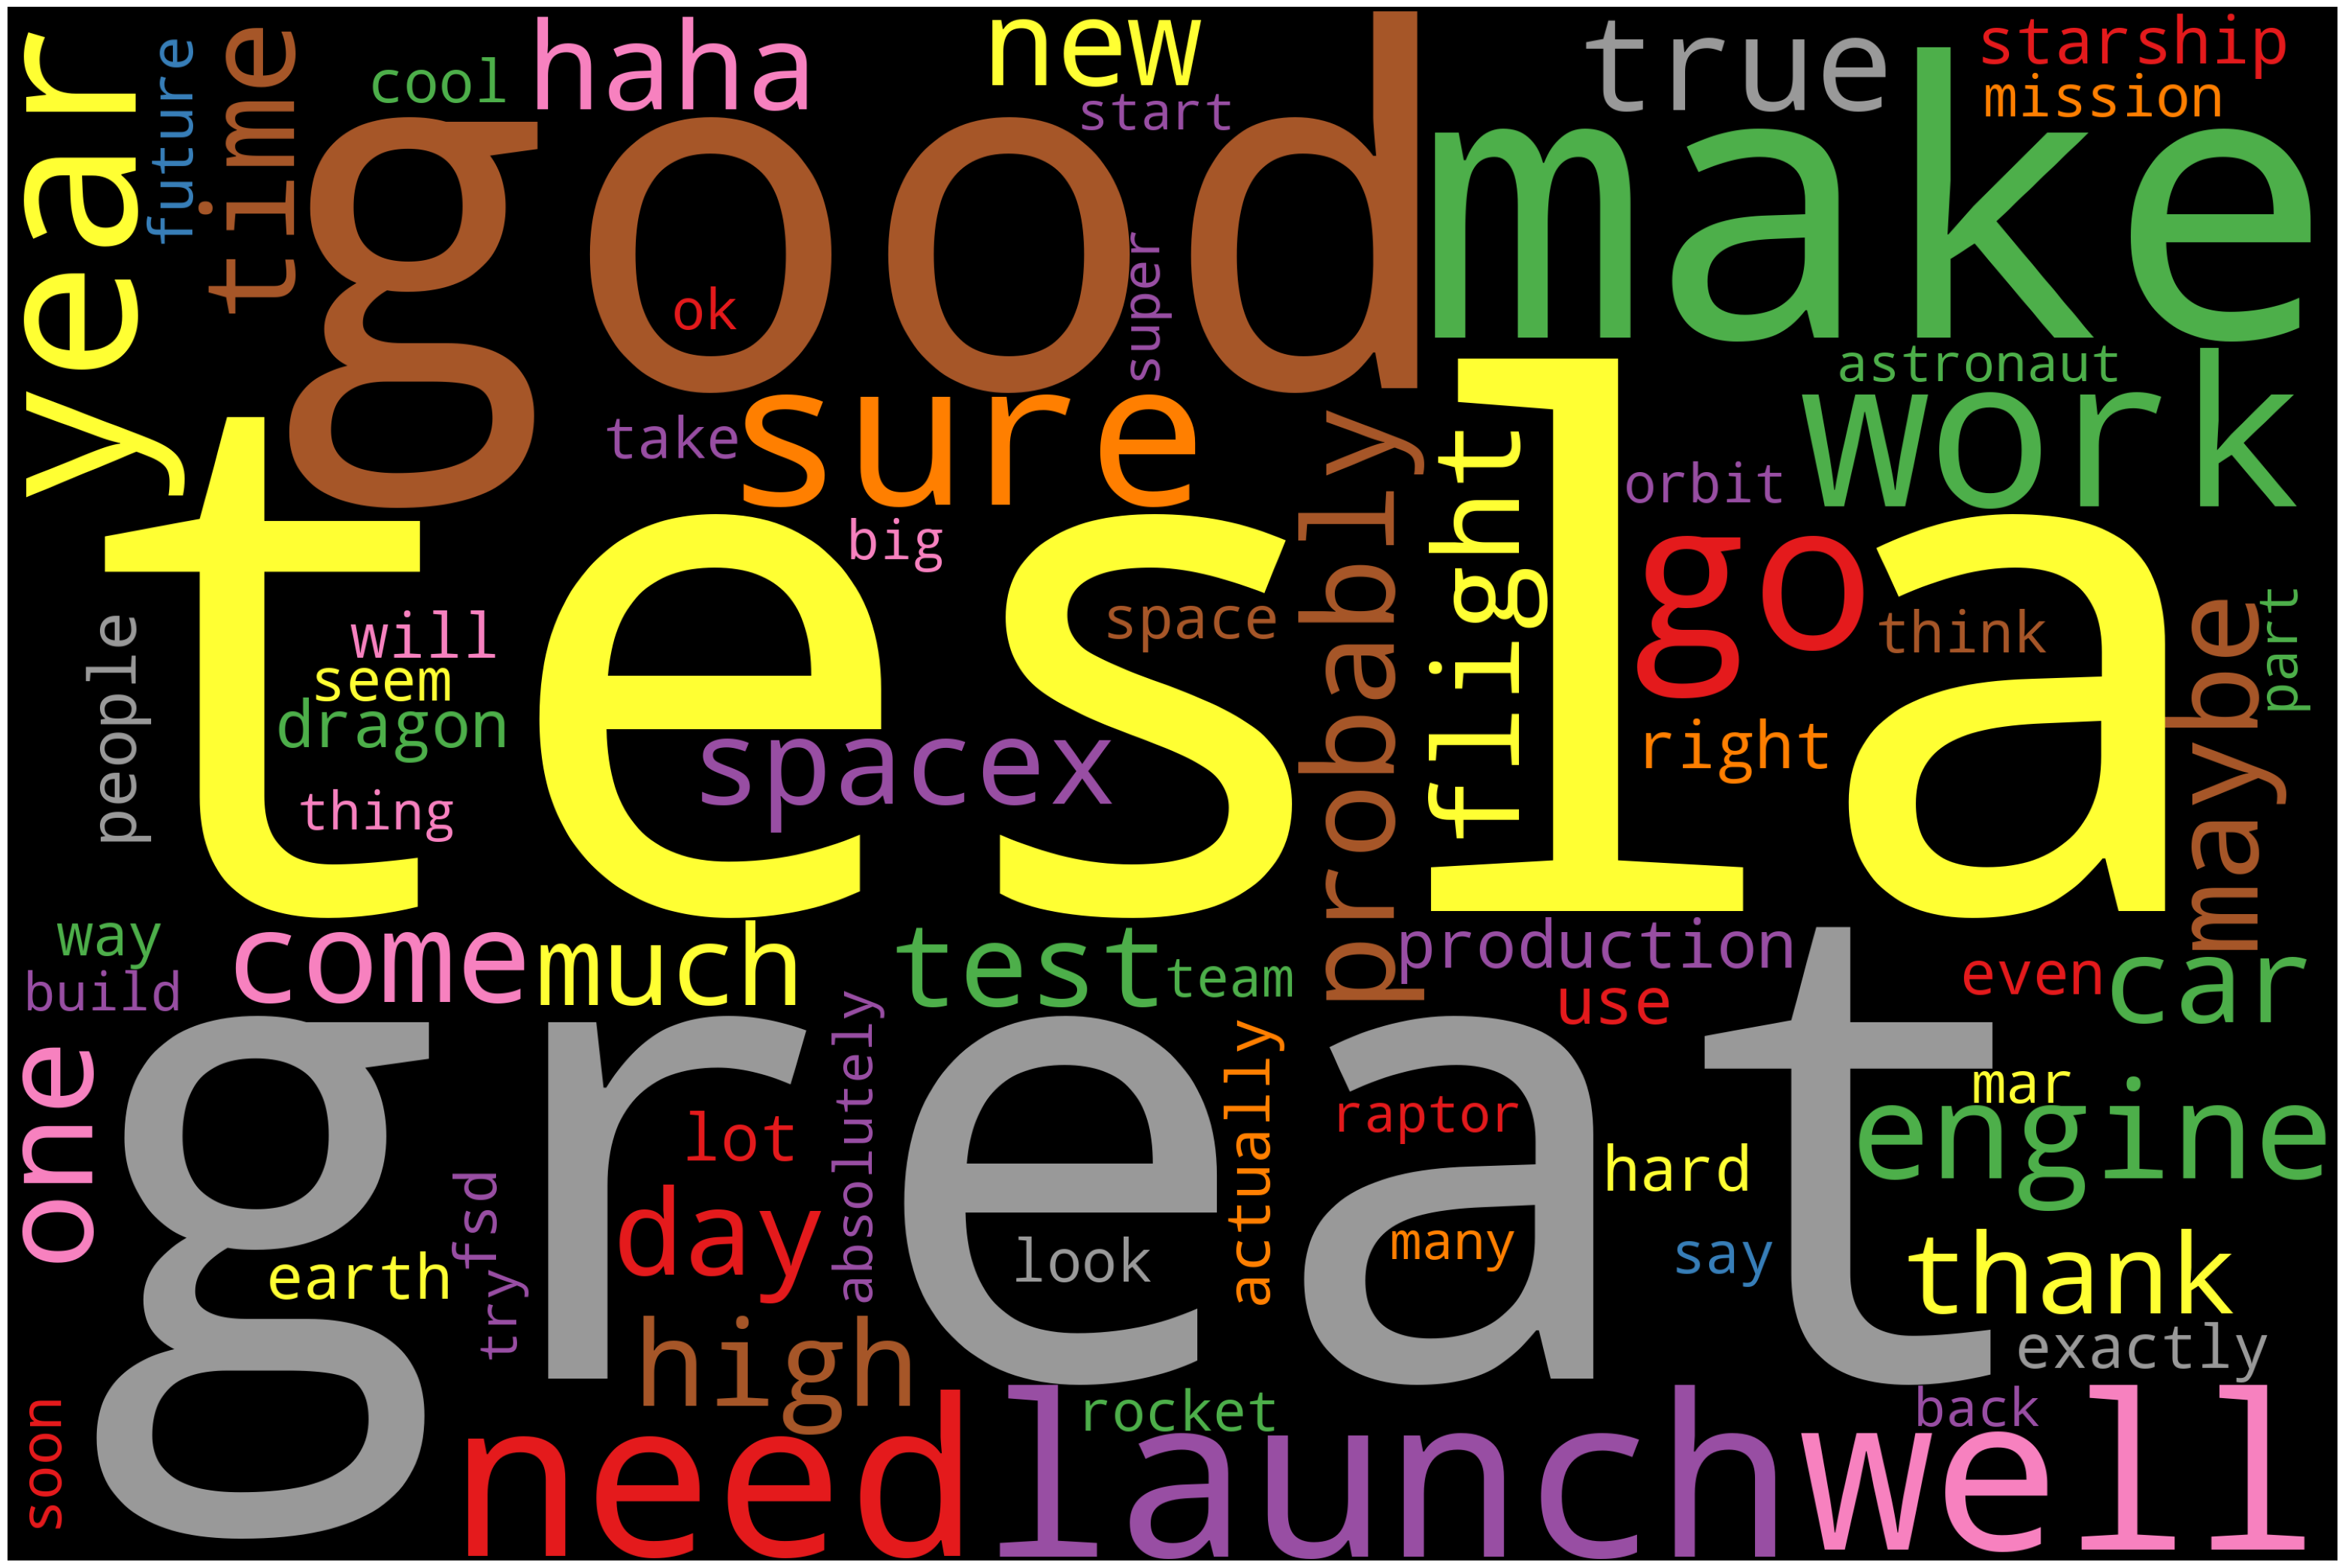

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [ ]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[100:200]:
    print(token,token.pos_)

wallet NOUN
' PUNCT
give VERB
private ADJ
key ADJ
avoid NOUN
cost VERB
22 NUM
your PRON
app NOUN
suck VERB
23 NUM
rt PROPN
nasa PROPN
select PROPN
falcon PROPN
heavy ADJ
launch NOUN
first ADJ
two NUM
element NOUN
lunar ADJ
gateway NOUN
together ADV
one NUM
mission NOUN
24 NUM
25 NUM
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink NOUN
ipo NOUN
27 NUM
spacex VERB
need NOUN
pass VERB
deep ADJ
chasm ADJ
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
… PUNCT
28 NUM
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g NOUN
… PUNCT
30 NUM
this PRON
intend VERB
earth NOUN
may AUX
idea NOUN
apply VERB
mar PROPN
31 NUM
32 NUM
xprize NOUN
team NOUN
manage VERB
100 NUM
m PROPN
carbon NOUN
capture NOUN
prize NOUN
33 NUM
everyone PRON
tesla NOUN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
table NOUN
that SCONJ
' PUNCT
' PUNCT
miss VERB
34 NUM
back ADJ
work NOUN


In [ ]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['tower', 'stack', 'raptor', 'orbit', 'work', 'tonight', 'ðogecoin', 'video', 'people', 'speak', 'cute', 'u0001f3b6', 'let', 'doge', 'rainforest', 'come', 'fun', 'crypto', 'simplicity', 'genius', 'yup', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'read', 'kingdom', 'haven', 'hear', 'name', 'year', 'dogecake', 'yolt', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'u0001f5a4', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'falcon', 'launch', 'mission', 'collect', 'datum', 'galaxy', 'explore', 'falcon', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min', 'throttle', 'point', 'risk', 'become', 'meme', 'destroyer', 'happen', 'sandstorm', 'dumb', 'time', 'try', 'pull', 'method', 'lowkey', 'need', 'dogecoin', 'people', 'ur']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,tesla,60
1,launch,58
2,make,54
3,year,46
4,need,42
5,work,40
6,go,39
7,come,38
8,get,33
9,engine,33


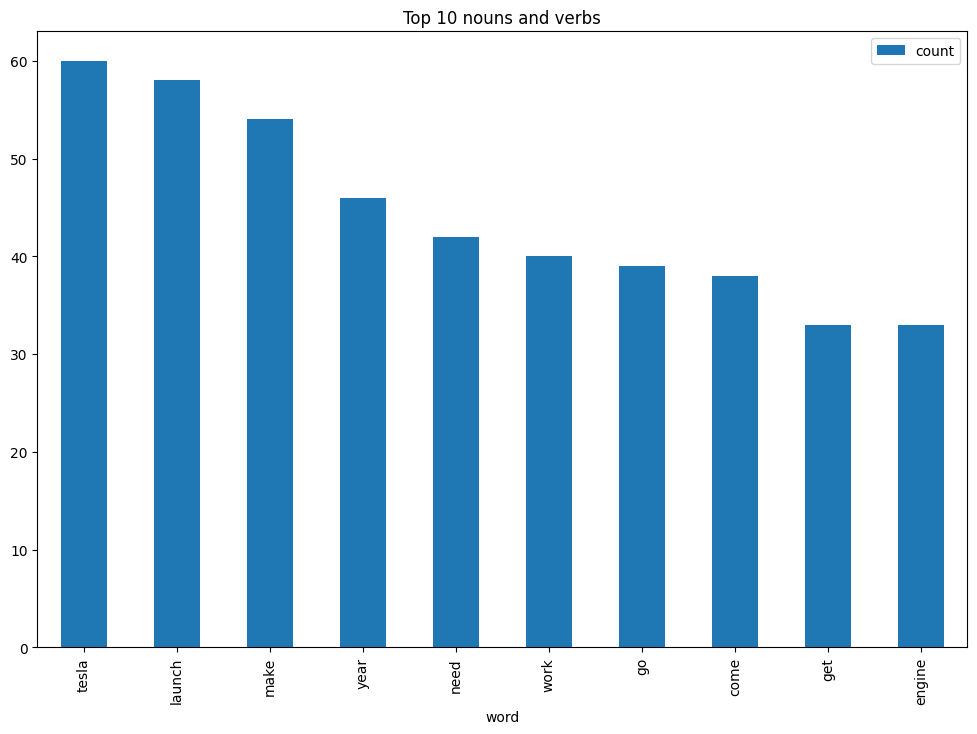

In [ ]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');